# Exercise 03: Bar charts



In [33]:
import pandas as pd
import sqlite3

In [34]:
conn = sqlite3.connect("../data/checking-logs.sqlite")
cur = conn.cursor()

## Analyze only the users, not the admins.

In [35]:
commit_data =  pd.read_sql("""
                SELECT timestamp as commit_time FROM checker
                WHERE uid LIKE 'user%'
            """, 
            conn, parse_dates='commit_time')
commit_data

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [36]:
commit_data['commit_date'] = commit_data.commit_time.dt.date
commit_data['commit_hour'] = commit_data.commit_time.dt.hour
commit_data['commit_weekday'] = commit_data.commit_time.dt.weekday
commit_data

,commit_time,commit_date,commit_hour,commit_weekday
0,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,2020-04-17 05:22:35.249331,2020-04-17,5,4
2,2020-04-17 05:22:45.549397,2020-04-17,5,4
3,2020-04-17 05:34:14.691200,2020-04-17,5,4
4,2020-04-17 05:34:24.422370,2020-04-17,5,4
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,3
3203,2020-05-21 20:22:41.785725,2020-05-21,20,3
3204,2020-05-21 20:22:41.877806,2020-05-21,20,3
3205,2020-05-21 20:37:00.129678,2020-05-21,20,3


In [37]:
commit_data.commit_date = pd.to_datetime(commit_data.commit_date)

In [38]:
commit_weekday = commit_data[commit_data.commit_weekday.isin([5,6])]
commit_weekday = commit_weekday[['commit_date','commit_hour']]
commit_weekday

,commit_date,commit_hour
23,2020-04-18,7
24,2020-04-18,13
25,2020-04-18,13
26,2020-04-18,13
27,2020-04-18,13
...,...,...
3088,2020-05-17,22
3089,2020-05-17,22
3090,2020-05-17,22
3091,2020-05-17,22


In [39]:
commit_weekday.commit_date.unique()

<DatetimeArray>
['2020-04-18 00:00:00', '2020-04-19 00:00:00', '2020-04-25 00:00:00',
 '2020-04-26 00:00:00', '2020-05-02 00:00:00', '2020-05-03 00:00:00',
 '2020-05-09 00:00:00', '2020-05-10 00:00:00', '2020-05-16 00:00:00',
 '2020-05-17 00:00:00']
Length: 10, dtype: datetime64[ns]

In [40]:
commit_working = commit_data[commit_data.commit_weekday.isin([0,1,2,3,4])]
commit_working = commit_working[['commit_hour','commit_date']]
commit_working

,commit_hour,commit_date
0,5,2020-04-17
1,5,2020-04-17
2,5,2020-04-17
3,5,2020-04-17
4,5,2020-04-17
...,...,...
3202,20,2020-05-21
3203,20,2020-05-21
3204,20,2020-05-21
3205,20,2020-05-21


In [41]:
commit_working.commit_date.unique()

<DatetimeArray>
['2020-04-17 00:00:00', '2020-04-20 00:00:00', '2020-04-21 00:00:00',
 '2020-04-22 00:00:00', '2020-04-23 00:00:00', '2020-04-24 00:00:00',
 '2020-04-27 00:00:00', '2020-04-28 00:00:00', '2020-04-29 00:00:00',
 '2020-04-30 00:00:00', '2020-05-01 00:00:00', '2020-05-04 00:00:00',
 '2020-05-05 00:00:00', '2020-05-06 00:00:00', '2020-05-07 00:00:00',
 '2020-05-08 00:00:00', '2020-05-11 00:00:00', '2020-05-12 00:00:00',
 '2020-05-13 00:00:00', '2020-05-14 00:00:00', '2020-05-15 00:00:00',
 '2020-05-18 00:00:00', '2020-05-19 00:00:00', '2020-05-20 00:00:00',
 '2020-05-21 00:00:00']
Length: 25, dtype: datetime64[ns]

In [42]:
working_hours = commit_working.groupby(['commit_hour','commit_date'], as_index = False).value_counts()
working_hours = working_hours[['commit_hour','count']].groupby('commit_hour').mean()
working_hours

,count
commit_hour,
0,3.000000
3,2.000000
5,7.500000
6,1.500000
7,5.166667
8,3.700000
9,6.000000
10,13.200000
11,6.769231


In [43]:
weekend_hours = commit_weekday.groupby(['commit_hour','commit_date'], as_index = False).value_counts()
weekend_hours = weekend_hours[['commit_hour','count']].groupby('commit_hour', as_index = False).mean()
weekend_hours

,commit_hour,count
0,0,2.000000
1,1,6.000000
2,3,1.000000
3,5,2.000000
4,7,4.000000
5,8,7.000000
6,9,3.666667
7,10,7.000000
8,11,23.600000
9,12,9.500000


In [44]:
df = pd.DataFrame({'hour' : list(range(0,24))}).merge(weekend_hours,how='left',left_on='hour',right_on='commit_hour')
df = df.drop(columns='commit_hour').rename(columns={'count':'weekend'}).fillna(0)
df = df.merge(working_hours,how='left',left_on='hour',right_on='commit_hour')
df = df.rename(columns={'count':'working_day'}).fillna(0)
df

,hour,weekend,working_day
0,0,2.000000,3.000000
1,1,6.000000,0.000000
2,2,0.000000,0.000000
3,3,1.000000,2.000000
4,4,0.000000,0.000000
5,5,2.000000,7.500000
6,6,0.000000,1.500000
7,7,4.000000,5.166667
8,8,7.000000,3.700000
9,9,3.666667,6.000000


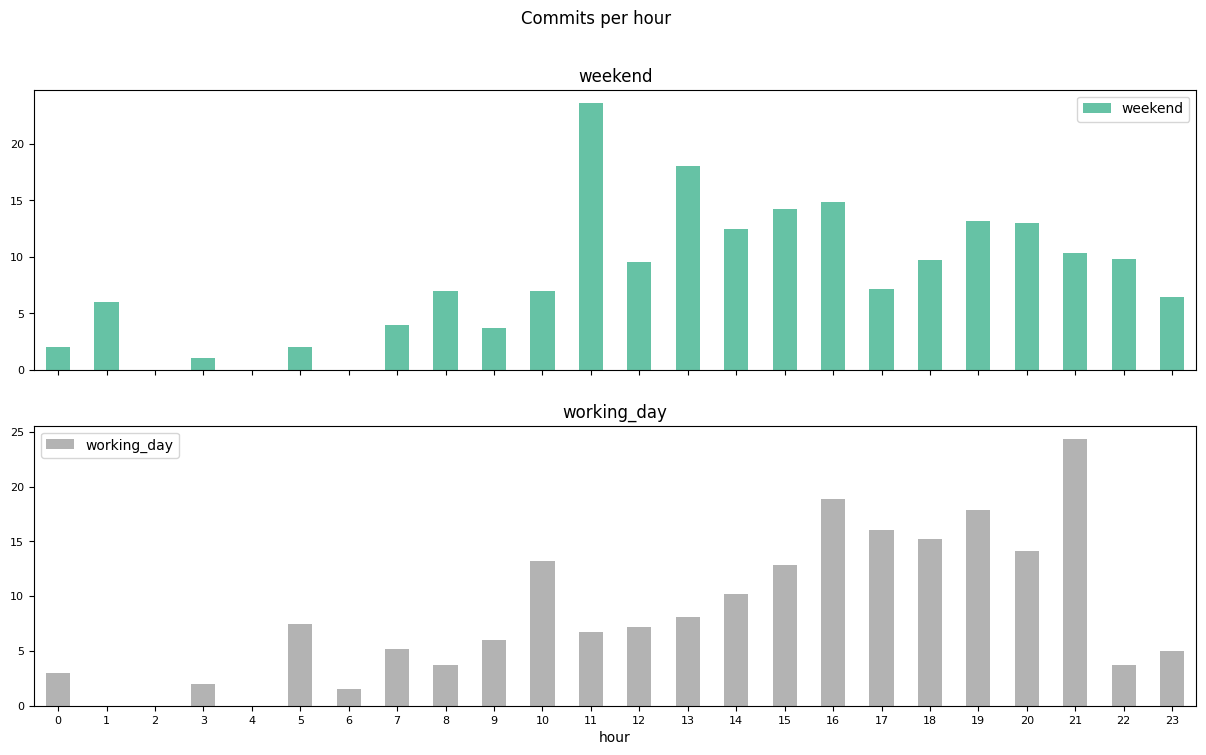

In [45]:
axes = df.plot.bar(x='hour', 
                   y=['weekend','working_day'],
                   rot = 0, 
                   subplots = True, 
                   figsize=(15,8),
                   fontsize = 8, 
                   title = 'Commits per hour', 
                   colormap='Set2'
                   )

# Is the dynamic different on working days and weekends?

In [46]:
# Hour when it is largest during the weekend
df[df.weekend == df.weekend.max()].hour

11    11
Name: hour, dtype: int64

In [47]:
# Number of commits is largest during working days
df[df.working_day == df.working_day.max()].hour

21    21
Name: hour, dtype: int64

In [48]:
conn.close()